In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("notebook")
sns.set_palette(sns.color_palette("magma_r"))

## 3. Візуалізація даних

Uploading the exported extended iris dataset to do statistics on it

In [2]:
extended_iris = pd.read_csv('edited_extended_iris_df.csv')
extended_iris.head()

,species,species_code,elevation,soil_code,sepal_length,sepal_width,petal_length,petal_width,petal_curvature_mm,leaf_area_cm2
0,setosa,0,161.8,2,5.16,3.41,1.64,0.26,5.33,53.21
1,setosa,0,291.4,0,5.48,4.05,1.53,0.37,5.90,52.53
2,setosa,0,144.3,2,5.10,2.80,1.47,0.38,5.66,50.25
3,setosa,0,114.6,0,4.64,3.44,1.53,0.17,4.51,50.85
4,setosa,0,110.9,1,4.85,2.87,1.23,0.26,4.03,40.57


In [4]:
correlation = extended_iris.iloc[:, 1:].corr()
correlation

,species_code,elevation,soil_code,sepal_length,sepal_width,petal_length,petal_width,petal_curvature_mm,leaf_area_cm2
species_code,1.000000,0.000197,0.036476,0.739455,-0.340355,0.940339,0.928476,0.907670,0.790580
elevation,0.000197,1.000000,-0.037079,-0.202144,0.024748,-0.078673,0.001788,-0.014559,-0.005169
soil_code,0.036476,-0.037079,1.000000,0.042912,-0.579104,0.036008,-0.130446,0.048658,0.033880
sepal_length,0.739455,-0.202144,0.042912,1.000000,-0.288627,0.739432,0.690841,0.645211,0.602984
sepal_width,-0.340355,0.024748,-0.579104,-0.288627,1.000000,-0.393797,-0.261047,-0.278785,-0.248407
petal_length,0.940339,-0.078673,0.036008,0.739432,-0.393797,1.000000,0.901696,0.869443,0.757605
petal_width,0.928476,0.001788,-0.130446,0.690841,-0.261047,0.901696,1.000000,0.863894,0.749208
petal_curvature_mm,0.907670,-0.014559,0.048658,0.645211,-0.278785,0.869443,0.863894,1.000000,0.709533
leaf_area_cm2,0.790580,-0.005169,0.033880,0.602984,-0.248407,0.757605,0.749208,0.709533,1.000000


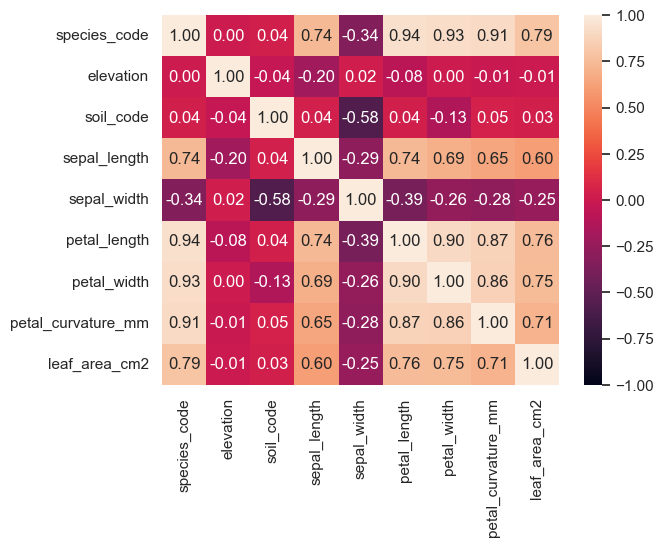

In [5]:
sns.heatmap(correlation, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

Species correlate the most with petal_length and petal_area (0.94 each), petal_width (0.93) and petal_curvature (0.91)

Species do not correlate at all with the soil type (0.04) and the elevation (0.00)

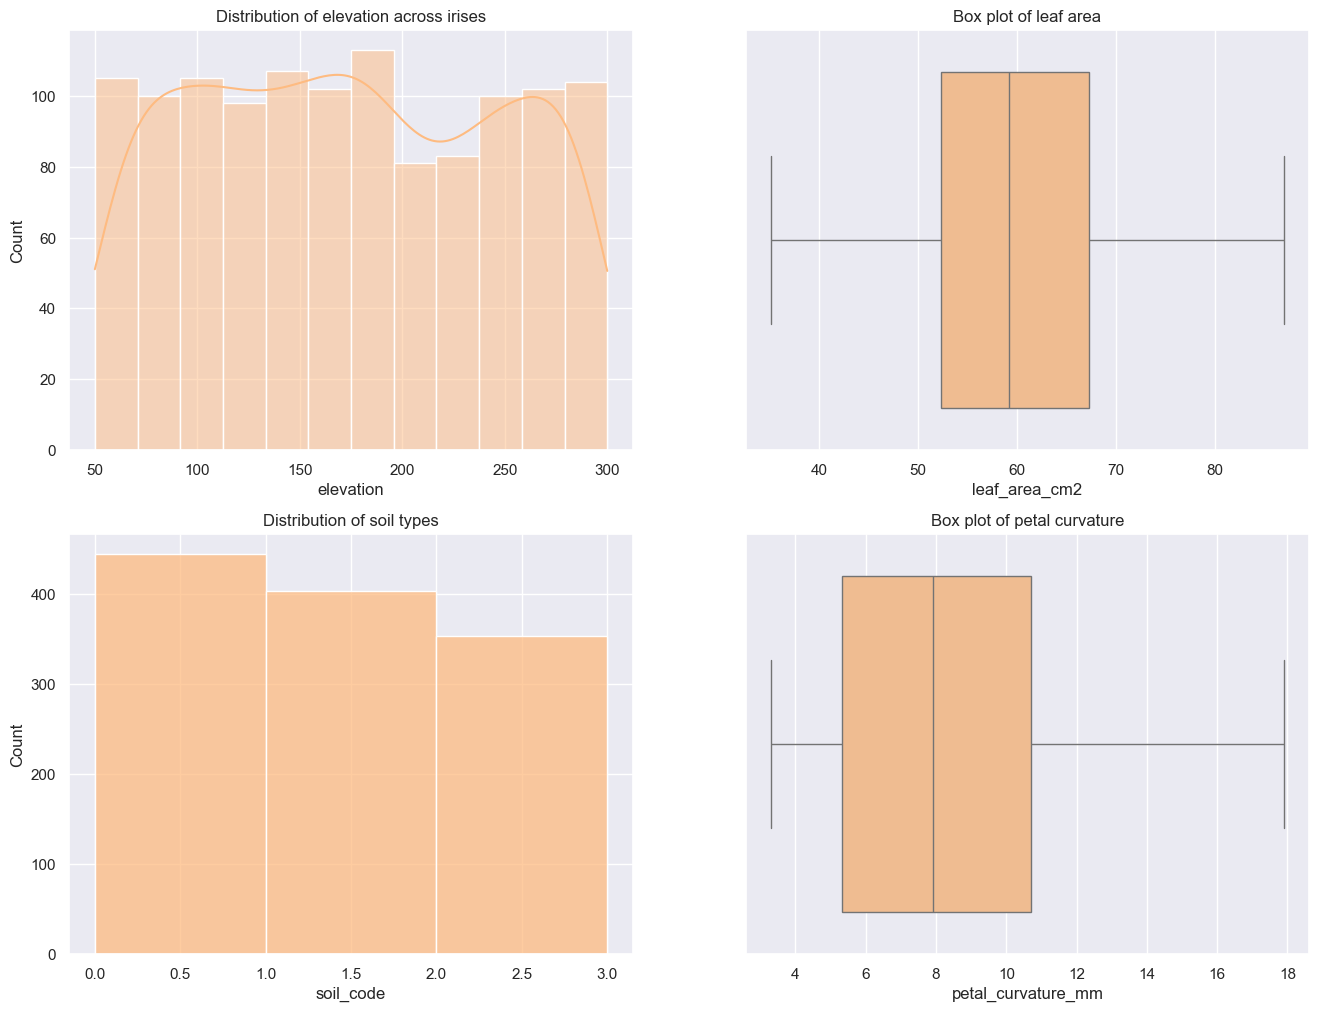

In [41]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.histplot(data=extended_iris, x="elevation", kde=True)
plt.title("Distribution of elevation across irises")

plt.subplot(2, 2, 2)
sns.boxplot(data=extended_iris, x="leaf_area_cm2")
plt.title("Box plot of leaf area")

plt.subplot(2, 2, 3)
sns.histplot(data=extended_iris, x="soil_code", bins=[0, 1, 2, 3])
plt.title("Distribution of soil types")

plt.subplot(2, 2, 4)
sns.boxplot(data=extended_iris, x="petal_curvature_mm")
plt.title("Box plot of petal curvature")

plt.show()

These are visualizations of the new characteristics added to this dataset. 
1) elevation ranges from 50 to 300, with a seemingly uniform distribution
2) the leaf area has a normal distribution, while the petal curvature skews to the left
3) soil types are distributed mostly uniformly as well, with the most frequent soil type appearing approx. 450 types while the least frequent one appearing 350 times. 

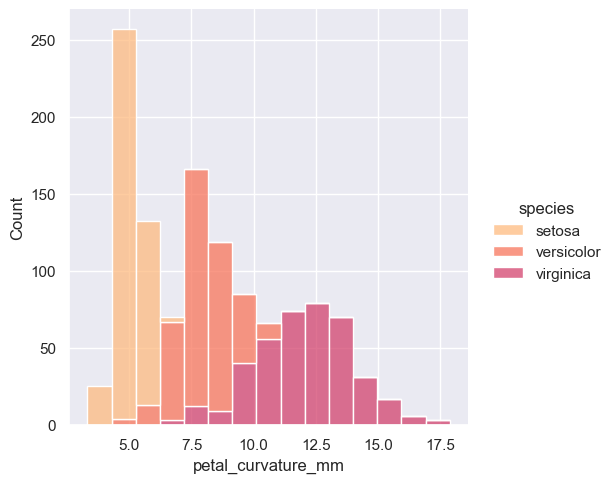

In [14]:
sns.displot(data=extended_iris, x="petal_curvature_mm", hue="species", multiple="stack")
plt.show()

Since petal_length and petal_width had a strong correlation in the original Iris dataset as well, I chose to look at the third highest correlation characteristic, which is the petal's curvature. 

We can see that Setosa species have the smallest curvature, with the majority of them centering around the 5-6 mm range. This is consistent with what we know about Setosa's petals, as they are very small compared to the other two irises. 

Virginica's distribution has a bell curve shape and it contains a wider range of petal curvatures compared to both Setosa and Versicolor. 

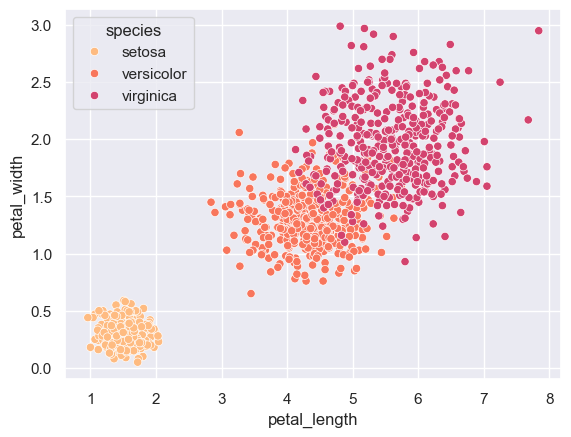

In [21]:
sns.scatterplot(data=extended_iris, x="petal_length", y="petal_width", hue="species")
plt.show()

Like in the original Iris dataset, petal width and petal length have a strong correlation with species. All the Setosa irises congregate in the lower corner, while Versicolor and Virginica are spread across a larger area and have a considerable overlap. 

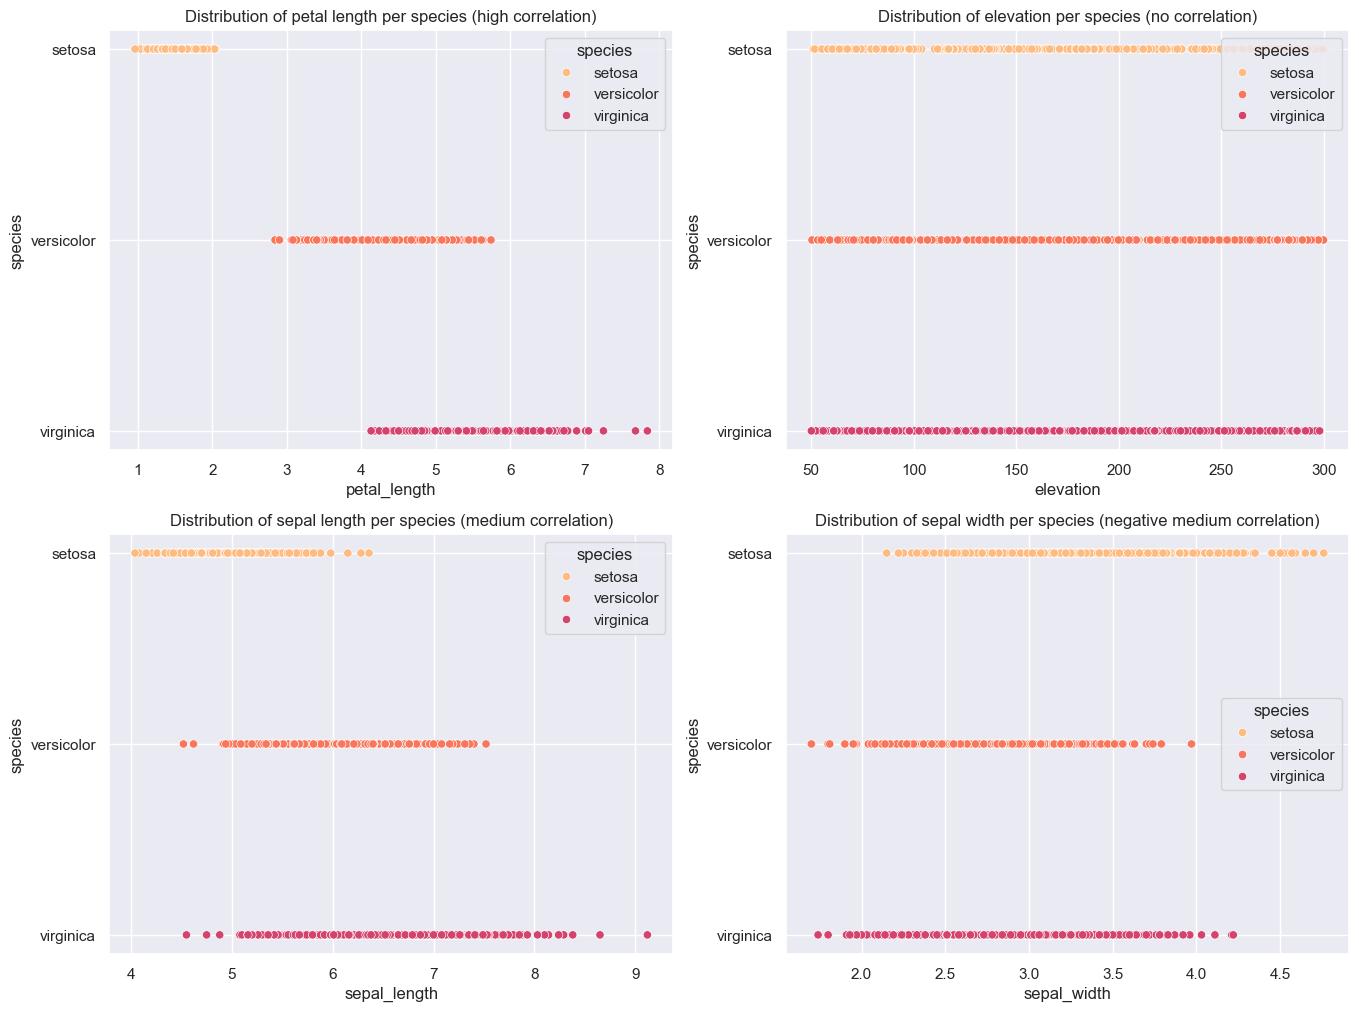

In [32]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(data=extended_iris, x="petal_length", y="species", hue="species")
plt.title("Distribution of petal length per species (high correlation)")

plt.subplot(2, 2, 2)
sns.scatterplot(data=extended_iris, x="elevation", y="species", hue="species")
plt.title("Distribution of elevation per species (no correlation)")

plt.subplot(2, 2, 3)
sns.scatterplot(data=extended_iris, x="sepal_length", y="species", hue="species")
plt.title("Distribution of sepal length per species (medium correlation)")

plt.subplot(2, 2, 4)
sns.scatterplot(data=extended_iris, x="sepal_width", y="species", hue="species")
plt.title("Distribution of sepal width per species (negative medium correlation)")
plt.show()

Visualization of correlation between characteristics and species using scatterplot: 
1) petal length (high correlation)
2) elevation (no correlation)
3) sepal length (medium correlation)
4) sepal width (medium negative correlation)

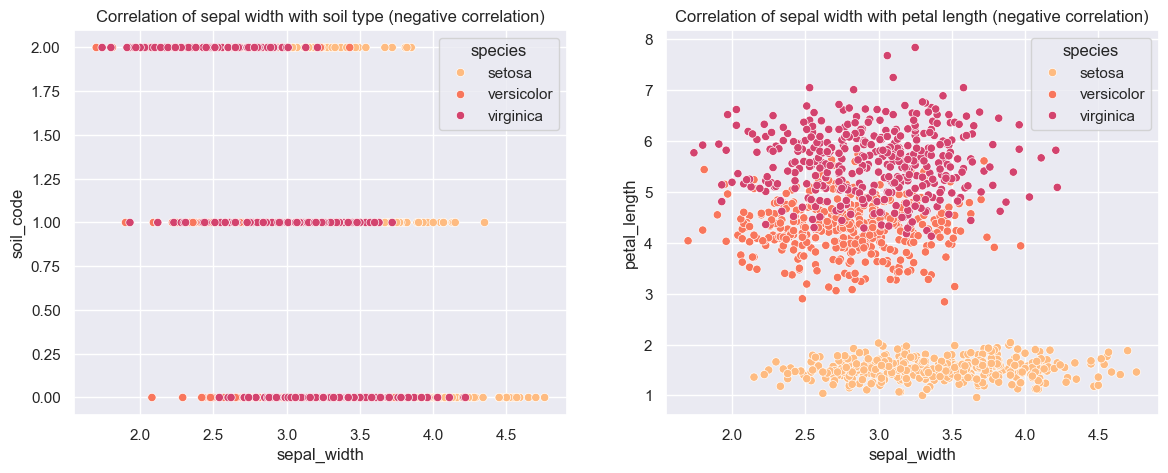

In [36]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=extended_iris, x="sepal_width", y="soil_code", hue="species")
plt.title("Correlation of sepal width with soil type (negative correlation)")

plt.subplot(1, 2, 2)
sns.scatterplot(data=extended_iris, x="sepal_width", y="petal_length", hue="species")
plt.title("Correlation of sepal width with petal length (negative correlation)")
plt.show()

Sepal width had the strongest negative correlations: with soil type and petal length. These scatterplots act as a visualization to these negative correlations